### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from skimage.transform import resize
from skimage.io import imread
import random
from os import path
import cv2
import random

### Set data path

In [2]:
DATA_SET_PATH = "/Users/j/CAPSTONE-PROJECT/Car-Dataset/"
ANNOTATION_PATH = "Annotations/"
TRAIN_IMAGES_DIR_PATH = "Car-Images/Train/"
TEST_IMAGES_DIR_PATH = "Car-Images/Test/"

In [3]:
"""
DATA_SET_PATH = "/Users/j/CAPSTONE-PROJECT/Car-Dataset/"
ANNOTATION_PATH = DATA_SET_PATH + "Annotations/"
TRAIN_IMAGES_DIR_PATH = DATA_SET_PATH + "Car-Images/Train/"
TEST_IMAGES_DIR_PATH = DATA_SET_PATH + "Car-Images/Test/"
"""

'\nDATA_SET_PATH = "/Users/j/CAPSTONE-PROJECT/Car-Dataset/"\nANNOTATION_PATH = DATA_SET_PATH + "Annotations/"\nTRAIN_IMAGES_DIR_PATH = DATA_SET_PATH + "Car-Images/Train/"\nTEST_IMAGES_DIR_PATH = DATA_SET_PATH + "Car-Images/Test/"\n'

### Load Car names and make data

In [4]:
car_makes_df = pd.read_csv("/Users/j/CAPSTONE-PROJECT/Car-Dataset/Car-names.csv", header=None, names=["car_make"]) 

In [5]:
car_makes_df

car_make
0          AM General Hummer SUV 2000
1                 Acura RL Sedan 2012
2                 Acura TL Sedan 2012
3                Acura TL Type-S 2008
4                Acura TSX Sedan 2012
..                                ...
191  Volkswagen Beetle Hatchback 2012
192          Volvo C30 Hatchback 2012
193              Volvo 240 Sedan 1993
194               Volvo XC90 SUV 2007
195     smart fortwo Convertible 2012

[196 rows x 1 columns]

In [6]:
car_makes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   car_make  196 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


### Load Annotations Data

In [7]:
car_annotations_train = pd.read_csv("/Users/j/CAPSTONE-PROJECT/Car-Dataset/Annotations/Train Annotations.csv")
car_annotations_test = pd.read_csv("/Users/j/CAPSTONE-PROJECT/Car-Dataset/Annotations/Test Annotation.csv")

In [8]:
car_annotations_train

Image Name  Bounding Box coordinates  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
0     00001.jpg                        39         116         569         375   
1     00002.jpg                        36         116         868         587   
2     00003.jpg                        85         109         601         381   
3     00004.jpg                       621         393        1484        1096   
4     00005.jpg                        14          36         133          99   
...         ...                       ...         ...         ...         ...   
8139  08140.jpg                         3          44         423         336   
8140  08141.jpg                       138         150         706         523   
8141  08142.jpg                        26         246         660         449   
8142  08143.jpg                        78         526        1489         908   
8143  08144.jpg                        20         240         862         677   

      Image class  
0              14  
1               3  
2              91  
3             134  
4             106  
...           ...  
8139           78  
8140          196  
8141          163  
8142          112  
8143           17  

[8144 rows x 6 columns]

In [9]:
car_annotations_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8144 entries, 0 to 8143
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Image Name                8144 non-null   object
 1   Bounding Box coordinates  8144 non-null   int64 
 2   Unnamed: 2                8144 non-null   int64 
 3   Unnamed: 3                8144 non-null   int64 
 4   Unnamed: 4                8144 non-null   int64 
 5   Image class               8144 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 381.9+ KB


In [10]:
car_annotations_test

Image Name  Bounding Box coordinates  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
0     00001.jpg                        30          52         246         147   
1     00002.jpg                       100          19         576         203   
2     00003.jpg                        51         105         968         659   
3     00004.jpg                        67          84         581         407   
4     00005.jpg                       140         151         593         339   
...         ...                       ...         ...         ...         ...   
8036  08037.jpg                        49          57        1169         669   
8037  08038.jpg                        23          18         640         459   
8038  08039.jpg                        33          27         602         252   
8039  08040.jpg                        33         142         521         376   
8040  08041.jpg                        77          73         506         380   

      Image class  
0             181  
1             103  
2             145  
3             187  
4             185  
...           ...  
8036           63  
8037           16  
8038           17  
8039           38  
8040           32  

[8041 rows x 6 columns]

In [11]:
car_annotations_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8041 entries, 0 to 8040
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Image Name                8041 non-null   object
 1   Bounding Box coordinates  8041 non-null   int64 
 2   Unnamed: 2                8041 non-null   int64 
 3   Unnamed: 3                8041 non-null   int64 
 4   Unnamed: 4                8041 non-null   int64 
 5   Image class               8041 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 377.0+ KB


### car_annotations_test data has 6 features with no null/missing value.
### Bounding Box coordinates, Unnamed: 2, Unnamed: 3, Unnamed: 4 are x1, y1, x2, y2 coordinates respectively

### Display images class and respective number of images
##### Use pd.option_context to display maximum rows

In [12]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
  print(pd.DataFrame(car_annotations_train['Image class']).value_counts())

Image class
119            68
79             49
161            48
167            48
144            47
56             47
98             46
171            46
162            46
191            46
20             46
182            46
95             46
43             46
112            46
194            46
153            45
147            45
44             45
179            45
53             45
123            45
59             45
121            45
65             45
73             45
72             45
148            45
115            45
114            45
81             45
82             45
109            45
107            45
1              45
165            45
6              45
8              45
34             45
24             45
187            44
160            44
188            44
164            44
74             44
75             44
76             44
85             44
89             44
16             44
94             44
170            44
151            44
105            44
108            4

#### Image class - 119 has maximum 68 images and Image class - 136 has minimum 24 images

#### Visualize train images and test images datasets

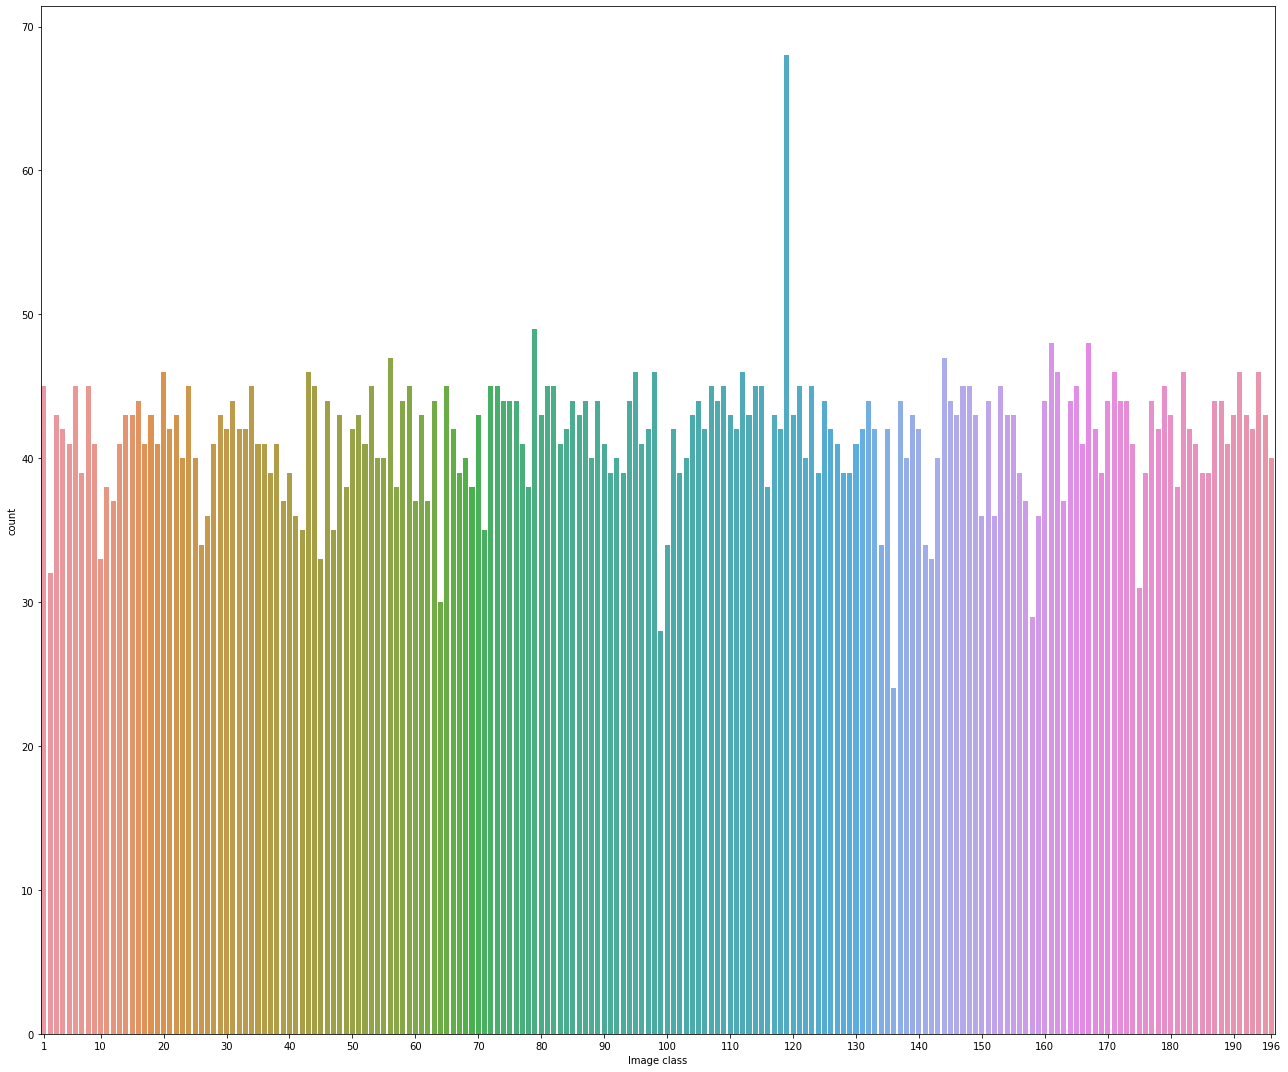

In [13]:
#%matplotlib inline
plt.subplots(figsize=(18,15))
ax = sns.countplot(data = car_annotations_train, x = car_annotations_train['Image class'] )
ax.set_xticks([0, 9,19,29,39,49,59,69,79,89,99,109,119,129,139,149,159,169,179,189,195] )
ax.set_xticklabels([1, 10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,196])
plt.tight_layout()
plt.show()

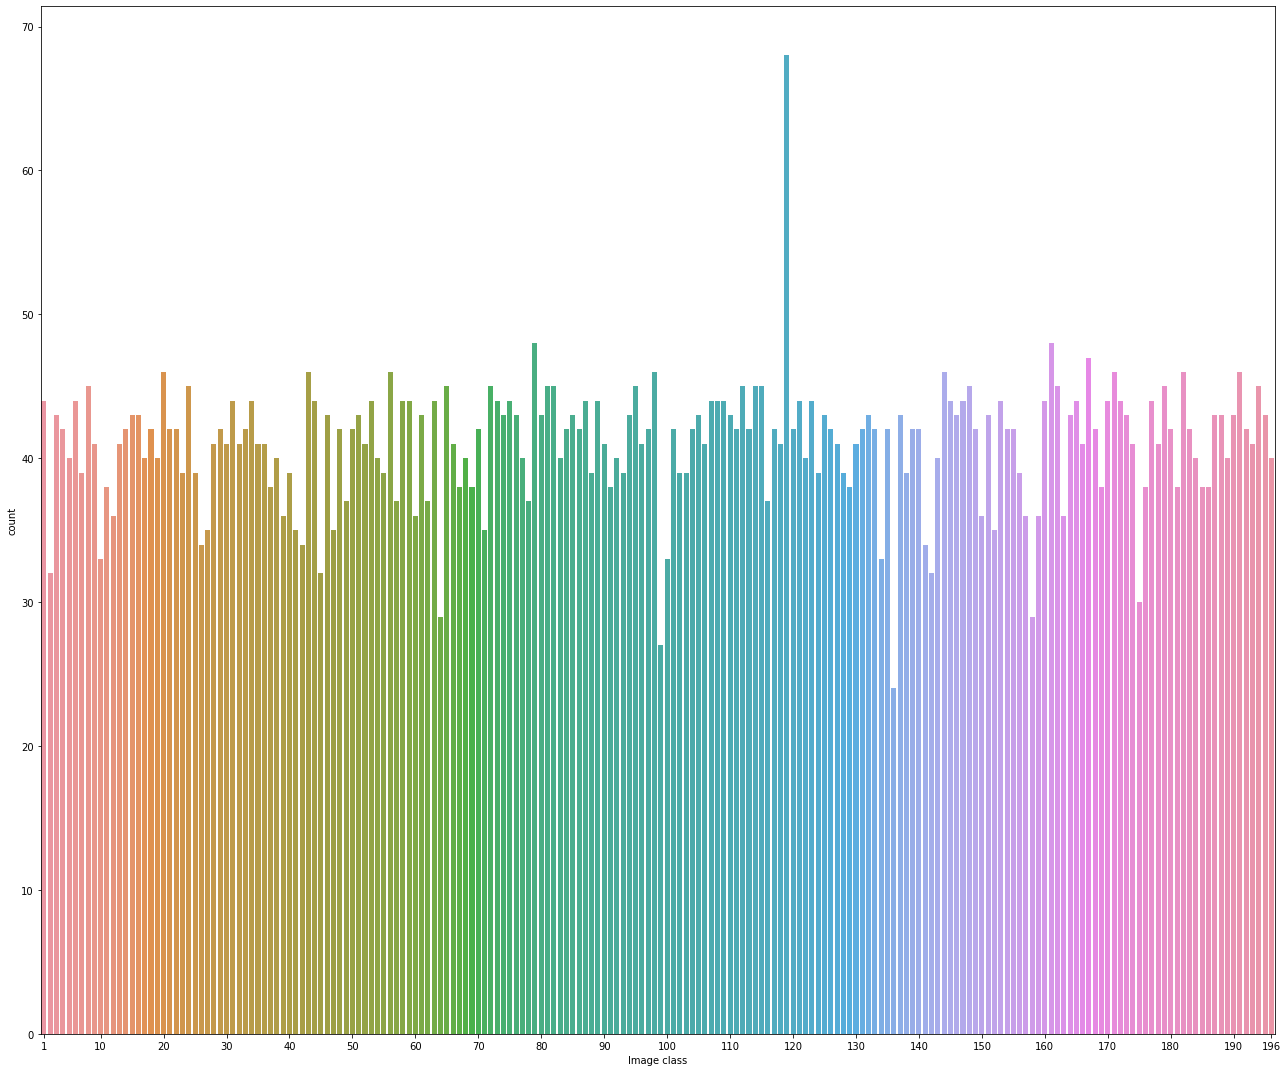

In [14]:
plt.subplots(figsize=(18,15))
ax = sns.countplot(data = car_annotations_test, x = car_annotations_test['Image class'] )
ax.set_xticks([0, 9,19,29,39,49,59,69,79,89,99,109,119,129,139,149,159,169,179,189,195] )
ax.set_xticklabels([1, 10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,196])
plt.tight_layout()
plt.show()

#### In Test Images, Image class - 119 has maximum images and Image class - 136 has minimum images

 ####  Step 2: Map training and testing images to its classes.

#### Custom function to create dataframe that contains Image Name, Full path of the image and Image class

In [15]:
def load_image_paths_and_map_class(car_makes, dir_path, df_annotations):
  data = []
  for car_make in car_makes:
    img_path =  dir_path + car_make
    if os.path.exists(img_path):
      for img in os.listdir(img_path):
        data.append([img, img_path + "/" +img, df_annotations[df_annotations["Image Name"]==img]["Image class"].values[0]])
  return pd.DataFrame(data, columns=["Image Name", "FullPath", "Image Class"])

In [16]:
train_images_path = load_image_paths_and_map_class(car_makes_df.car_make.values, TRAIN_IMAGES_DIR_PATH, car_annotations_train)
test_images_path = load_image_paths_and_map_class(car_makes_df.car_make.values, TEST_IMAGES_DIR_PATH, car_annotations_test)

#### Image Name, Image path and Image class are stored in train_images_path and test_images_path

In [17]:
print("Total Training Images:", len(train_images_path))
print("Total Testing Images:", len(test_images_path))

Total Training Images: 8103
Total Testing Images: 8000


#### Display train_images_path dataframe

In [18]:
train_images_path.head()

Image Name                                           FullPath  Image Class
0  00522.jpg  Car-Images/Train/AM General Hummer SUV 2000/00...            1
1  03943.jpg  Car-Images/Train/AM General Hummer SUV 2000/03...            1
2  01832.jpg  Car-Images/Train/AM General Hummer SUV 2000/01...            1
3  01952.jpg  Car-Images/Train/AM General Hummer SUV 2000/01...            1
4  02848.jpg  Car-Images/Train/AM General Hummer SUV 2000/02...            1

In [19]:
print("Image path:", train_images_path.iloc[0,1])
print("Image shape:", cv2.imread(train_images_path.iloc[0,1]).shape)

Image path: Car-Images/Train/AM General Hummer SUV 2000/00522.jpg
Image shape: (71, 94, 3)


#### Custom function to display random images along with respective class

In [20]:
def plot_random_cars(car_makes, images_path, is_export=False):
  export_paths = {}
  for car_make_idx in range(5):
      imageClass = random.randrange(0, len(car_makes_df))
      print(car_makes.iloc[imageClass].values[0])
      plt.figure(figsize=(15,12))
      for i in range(5):
        df = images_path[images_path["Image Class"]==imageClass]
        if len(df) > 0:
          idx = random.randrange(0, len(df))
          plt.subplot(5, 5, i+1)
          plt.xticks([])
          plt.yticks([])
          plt.grid(False)
          plt.imshow(imread(df.iloc[idx].FullPath))
      if is_export:
        p = str(imageClass) + "_class.png"
        plt.savefig(p)
        export_paths[car_makes.iloc[imageClass].values[0]] = p
      plt.show()
  return export_paths

In [21]:
car_makes_df.head()

car_make
0  AM General Hummer SUV 2000
1         Acura RL Sedan 2012
2         Acura TL Sedan 2012
3        Acura TL Type-S 2008
4        Acura TSX Sedan 2012

#### Display train images along with its class

Toyota Camry Sedan 2012


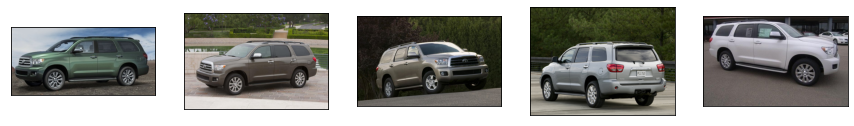

Dodge Durango SUV 2012


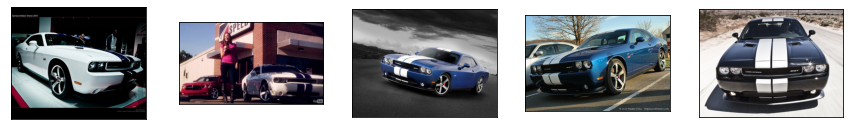

Toyota Corolla Sedan 2012


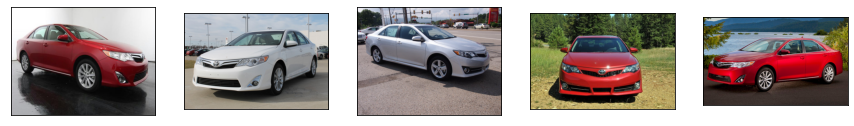

Ford Mustang Convertible 2007


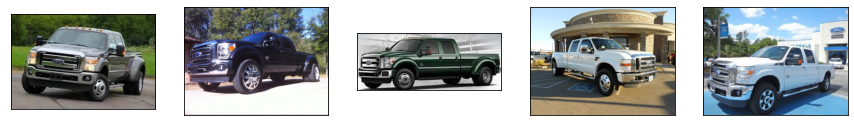

BMW 3 Series Wagon 2012


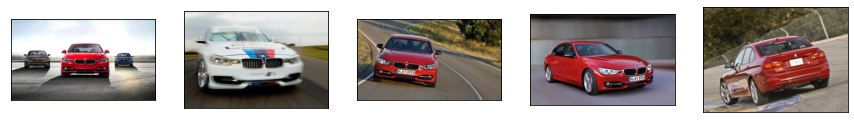

{}

In [22]:
plot_random_cars(car_makes_df, train_images_path)

#### Display Test images along with its class

Suzuki SX4 Sedan 2012


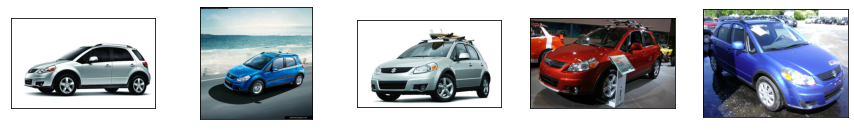

Plymouth Neon Coupe 1999


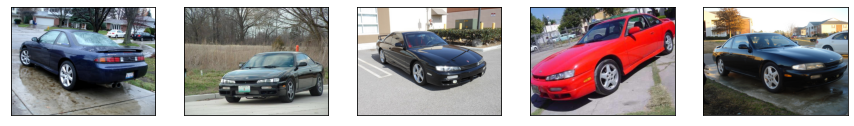

BMW 3 Series Sedan 2012


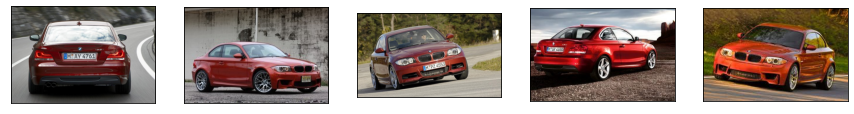

Chrysler Sebring Convertible 2010


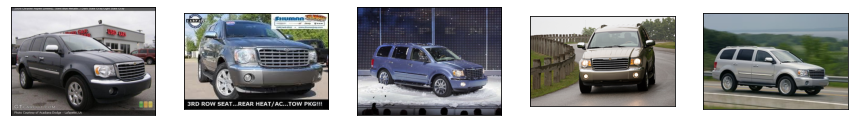

Mercedes-Benz E-Class Sedan 2012


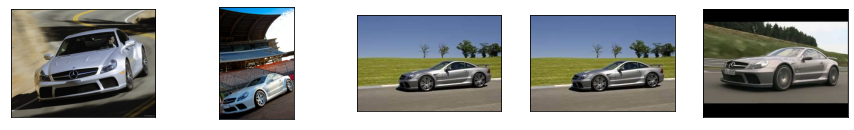

{}

In [23]:
plot_random_cars(car_makes_df, test_images_path)

####  Image Augmentation using Img_Aug library

In [24]:
import imageio
import imgaug as ia
import imgaug.augmenters as iaa
import glob

#### Augment training images

In [25]:
augmented_img = []
labels = []

for imgfolder in os.listdir(TRAIN_IMAGES_DIR_PATH):
  imgpath = TRAIN_IMAGES_DIR_PATH + imgfolder
  for img in glob.glob(imgpath + '/' + '*.jpg'):
    image = imageio.imread(img, pilmode="RGB")
    resize_image = iaa.Resize(224)
    image = resize_image.augment_image(image)
    augmented_img.append(image) ### image resized to 224 and appended ## actual image 
    labels.append(imgfolder) ### label appended
    
    #rotation 10
    rotate=iaa.Affine(rotate=(10))
    rotated_image=rotate.augment_image(image)
    augmented_img.append(rotated_image)
    labels.append(imgfolder)

    #rotation 20
    rotate=iaa.Affine(rotate=(20))
    rotated_image=rotate.augment_image(image)
    augmented_img.append(rotated_image)
    labels.append(imgfolder)

    #rotation 40
#     rotate=iaa.Affine(rotate=(40))
#     rotated_image=rotate.augment_image(image)
#     augmented_img.append(rotated_image)
#     labels.append(imgfolder)
    
    #Add gaussian_noise
    gaussian_noise=iaa.AdditiveGaussianNoise(10,20)
    noise_image=gaussian_noise.augment_image(image)
    augmented_img.append(noise_image)
    labels.append(imgfolder)

    gaussian_noise=iaa.AdditiveGaussianNoise(20,30)
    noise_image=gaussian_noise.augment_image(image)
    augmented_img.append(noise_image)
    labels.append(imgfolder)

#     gaussian_noise=iaa.AdditiveGaussianNoise(30,40)
#     noise_image=gaussian_noise.augment_image(image)
#     augmented_img.append(noise_image)
#     labels.append(imgfolder)
    
    #Crop images
    crop = iaa.Crop(percent=(0.1)) # crop image
    crop_image=crop.augment_image(image)
    augmented_img.append(crop_image)
    labels.append(imgfolder)

    #shear
    shear = iaa.Affine(shear=(20,30))
    shear_image=shear.augment_image(image)
    augmented_img.append(shear_image)
    labels.append(imgfolder)

    shear = iaa.Affine(shear=(0,10))
    shear_image=shear.augment_image(image)
    augmented_img.append(shear_image)
    labels.append(imgfolder)

    shear = iaa.Affine(shear=(10,20))
    shear_image=shear.augment_image(image)
    augmented_img.append(shear_image)
    labels.append(imgfolder)

    #flip_hr=iaa.Flipud(p=1.0)
    #flip_hr_image= flip_hr.augment_image(image)
    #augmented_img.append(flip_hr_image)
    #labels.append(imgfolder)
    
    #Contrast
    contrast=iaa.GammaContrast(gamma=2.0)
    contrast_image =contrast.augment_image(image)
    augmented_img.append(contrast_image)
    labels.append(imgfolder)

    #Scale images
    scale_im=iaa.Affine(scale={"x": (1.5, 1.0), "y": (1.5, 1.0)})
    scale_image =scale_im.augment_image(image)
    augmented_img.append(scale_image)
    labels.append(imgfolder)

/var/folders/b6/ryf5z7sj707bhc_8q_jkk7q00000gn/T/ipykernel_33140/978375278.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(img, pilmode="RGB")


#### Test images resized to 224, No augmentation

In [26]:
augmented_img_test = []
labels_test = []

for imgfolder in os.listdir(TEST_IMAGES_DIR_PATH):
  imgpath = TEST_IMAGES_DIR_PATH + imgfolder
  for img in glob.glob(imgpath + '/' + '*.jpg'):
    image = imageio.imread(img,pilmode="RGB")
    resize_image = iaa.Resize(224)
    image = resize_image.augment_image(image)
    augmented_img_test.append(image)
    labels_test.append(imgfolder)

/var/folders/b6/ryf5z7sj707bhc_8q_jkk7q00000gn/T/ipykernel_33140/3694155021.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(img,pilmode="RGB")


In [27]:
## Convert to numpy array

augmented_img_test = np.array(augmented_img_test)
labels_test = np.array(labels_test)

augmented_img = np.array(augmented_img)
labels = np.array(labels)

In [28]:
## Apply label encoder on labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(labels)
labels_enc = le.transform(labels)

le = LabelEncoder()

le.fit(labels_test)
labels_test_enc = le.transform(labels_test)

#### Check shape and length of augmented images

In [29]:
augmented_img[0].shape,augmented_img[24].shape, np.array(augmented_img).shape, len(labels)

((224, 224, 3), (224, 224, 3), (89584, 224, 224, 3), 89584)

#### Display augmented images

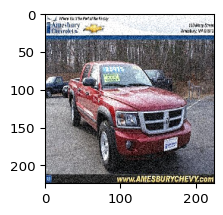

In [30]:
ia.imshow(augmented_img[3])

In [31]:
pd.DataFrame(labels_enc).value_counts()

119    748
75     539
160    528
166    528
143    517
      ... 
175    341
59     330
157    319
98     308
129    264
Length: 196, dtype: int64

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten, Dropout

#### Map training and testing images to its annotations.

#### Custom function to map images to its annotations

In [33]:
def plot_random_cars_with_bounding_box(car_makes, images_path, annotations, is_export=False):
  export_paths = {}
  for car_make_idx in range(5):
      imageClass = random.randrange(0, len(car_makes_df))
      print(car_makes.iloc[imageClass].values[0])
      plt.figure(figsize=(15,12))
      for i in range(3):
        df = images_path[images_path["Image Class"]==imageClass]
        if len(df) > 0:
          idx = random.randrange(0, len(df))
          plt.subplot(3, 3, i+1)
          plt.xticks([])
          plt.yticks([])
          plt.grid(False)
          img = imread(df.iloc[idx].FullPath)
          ann = annotations[annotations["Image Name"] == df.iloc[idx]["Image Name"]]
          x1,y1,x2,y2 = ann['Bounding Box coordinates'].values[0], ann['Unnamed: 2'].values[0], ann['Unnamed: 3'].values[0], ann['Unnamed: 4'].values[0]
          cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),2) # add rectangle to image
          plt.imshow(img)
      if is_export:
        p = str(imageClass) + "_bb.png"
        plt.savefig(p)
        export_paths[car_makes.iloc[imageClass].values[0]] = p
      plt.show()
  return export_paths

#### Display images with bounding box
#### Draw bounding box on Train Images

GMC Yukon Hybrid SUV 2012


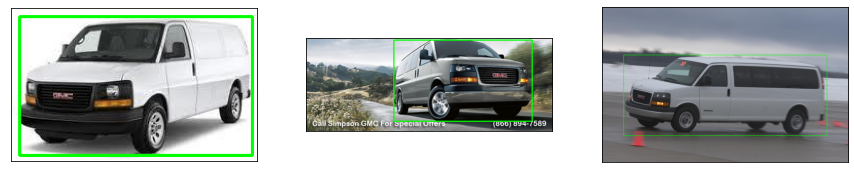

BMW Z4 Convertible 2012


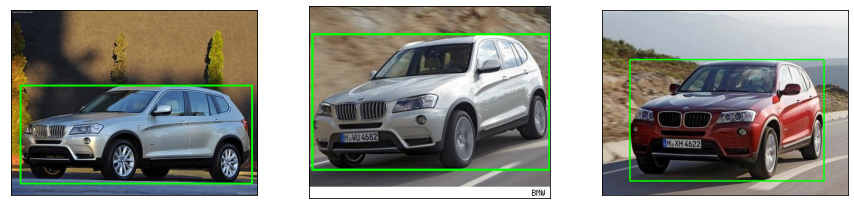

Dodge Journey SUV 2012


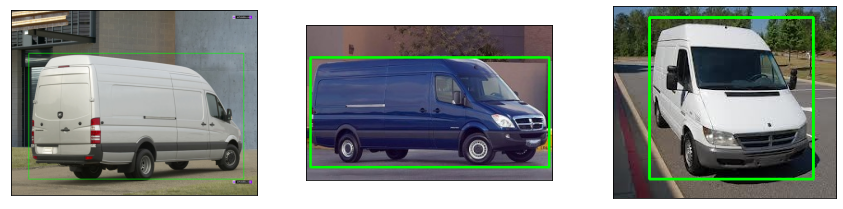

Cadillac CTS-V Sedan 2012


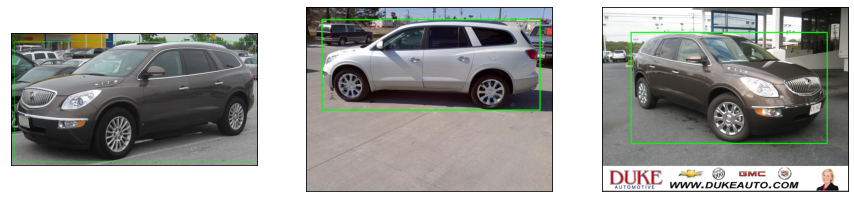

Ford Focus Sedan 2007


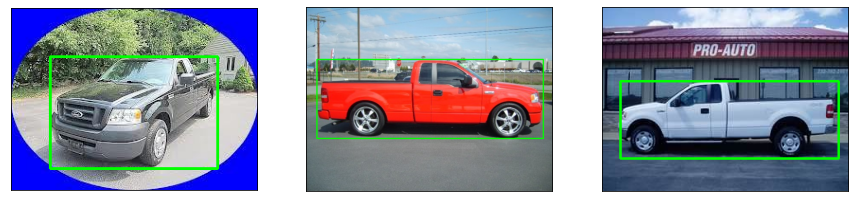

{}

In [34]:
plot_random_cars_with_bounding_box(car_makes_df, train_images_path, car_annotations_train)

#### Draw Bounding Box on Test Images

Ford Focus Sedan 2007


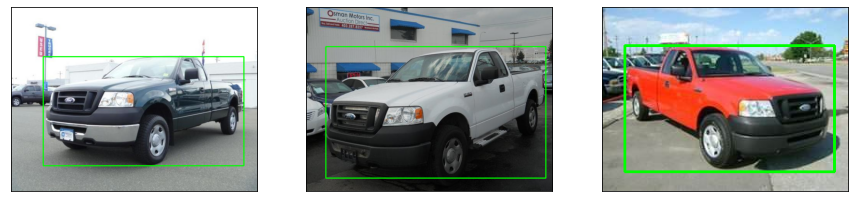

BMW 1 Series Convertible 2012


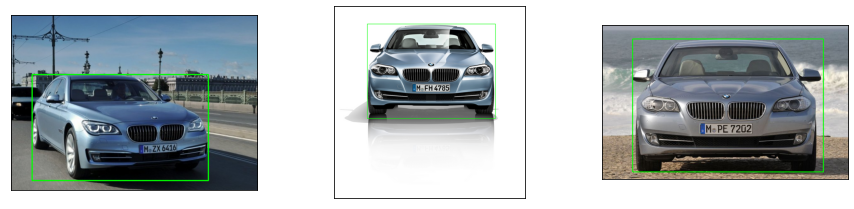

Porsche Panamera Sedan 2012


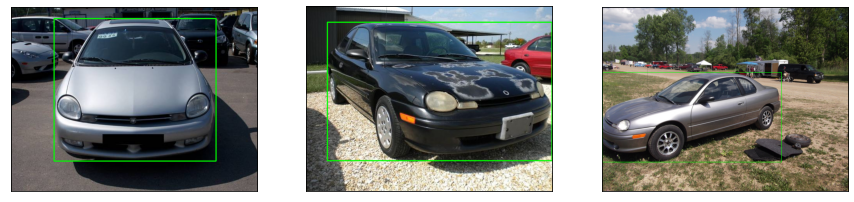

Suzuki SX4 Sedan 2012


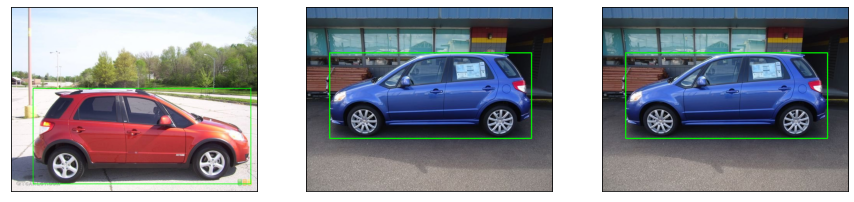

Dodge Charger SRT-8 2009


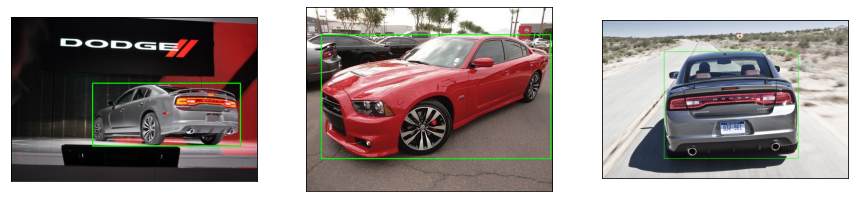

{}

In [35]:
plot_random_cars_with_bounding_box(car_makes_df, test_images_path,car_annotations_test)

####  Output: 
#### Images mapped to its class and annotation ready to be used for deep learning

### #Milestone 2

### Classification Model

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten, Dropout
Image_Size = 224
Batch_Size = 32
Epochs = 10

#### Define Callbacks

In [37]:
from tensorflow.keras.callbacks import LearningRateScheduler, ReduceLROnPlateau, ModelCheckpoint

#model checkpoint to save the model after every epoch
SavePath = "models/ResNetModel_weights.{epoch:02d}.hdf5"
model_checkpoint = ModelCheckpoint(
    filepath=SavePath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='auto')

lr_schedule = LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch/2)) # change learning rate from 1e-8 to 1e-3

Redlr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=5, verbose=0,
    mode='auto', min_delta=0.0001, cooldown=0, min_lr=0.00001)

### Data Generator w/o Augmentation

##### Load the image during training using flow from directory function

In [38]:
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(TRAIN_IMAGES_DIR_PATH, target_size = (Image_Size, Image_Size), batch_size=Batch_Size, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(TEST_IMAGES_DIR_PATH, target_size = (Image_Size, Image_Size), batch_size=Batch_Size, class_mode='categorical')


Found 8144 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.


### MobileNet Model

In [39]:
from tensorflow.keras.applications.mobilenet import MobileNet

base_model = MobileNet(input_shape=(Image_Size, Image_Size, 3), include_top=False)

#Freeze all the layers
for layer in base_model.layers:
        layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x) #average pooling of the last feature extractor layer 
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(196, activation='softmax')(x) #Dense layer for 196 output class

model = Model(inputs=base_model.input, outputs=x)

model.summary()

2022-07-04 11:44:21.160724: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-04 11:44:21.161008: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                    

In [40]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=10, validation_data=test_generator, validation_steps=len(test_generator))

Epoch 1/10


2022-07-04 11:45:16.821337: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-04 11:45:17.488926: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


255/255 [==============================] - ETA: 0s - loss: 4.5091 - accuracy: 0.0621

2022-07-04 11:45:50.952572: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


255/255 [==============================] - 66s 253ms/step - loss: 4.5091 - accuracy: 0.0621 - val_loss: 3.5834 - val_accuracy: 0.1416
Epoch 2/10
255/255 [==============================] - 64s 251ms/step - loss: 2.9559 - accuracy: 0.2504 - val_loss: 2.7856 - val_accuracy: 0.2835
Epoch 3/10
255/255 [==============================] - 63s 249ms/step - loss: 2.1203 - accuracy: 0.4273 - val_loss: 2.4766 - val_accuracy: 0.3579
Epoch 4/10
255/255 [==============================] - 64s 251ms/step - loss: 1.5597 - accuracy: 0.5657 - val_loss: 2.2814 - val_accuracy: 0.3988
Epoch 5/10
255/255 [==============================] - 64s 251ms/step - loss: 1.1536 - accuracy: 0.6694 - val_loss: 2.1280 - val_accuracy: 0.4445
Epoch 6/10
255/255 [==============================] - 64s 251ms/step - loss: 0.8601 - accuracy: 0.7446 - val_loss: 2.2399 - val_accuracy: 0.4266
Epoch 7/10
255/255 [==============================] - 65s 253ms/step - loss: 0.5861 - accuracy: 0.8358 - val_loss: 2.1377 - val_accuracy: 0.4

Training accuracy of 95% and test accuracy of 47% is achieved.

The model is overfitting on the training data

### Data Generator with real time augmentation

In [42]:
# We will augment the image by applying shear, zoom & horizontal flip
train_datagen = ImageDataGenerator(rescale=1.0/255, shear_range=0.2, zoom_range=0.5, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(TRAIN_IMAGES_DIR_PATH, target_size = (Image_Size, Image_Size), batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(TEST_IMAGES_DIR_PATH, target_size = (Image_Size, Image_Size), batch_size=32, class_mode='categorical')

Found 8144 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.


### MobileNet Model

In [43]:
from tensorflow.keras.applications.mobilenet import MobileNet

base_model = MobileNet(input_shape=(Image_Size, Image_Size, 3), include_top=False)

#Freeze all the layers
for layer in base_model.layers:
        layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(196, activation='softmax')(x)

MobileNet_model = Model(inputs=base_model.input, outputs=x)

MobileNet_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

In [44]:
MobileNet_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
history = MobileNet_model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=Epochs, validation_data=test_generator, validation_steps=len(test_generator))

Epoch 1/10


2022-07-04 12:00:43.418443: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


255/255 [==============================] - ETA: 0s - loss: 4.8790 - accuracy: 0.0290

2022-07-04 12:01:49.062911: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


255/255 [==============================] - 98s 380ms/step - loss: 4.8790 - accuracy: 0.0290 - val_loss: 3.9983 - val_accuracy: 0.0975
Epoch 2/10
255/255 [==============================] - 96s 376ms/step - loss: 3.6883 - accuracy: 0.1349 - val_loss: 3.2646 - val_accuracy: 0.1867
Epoch 3/10
255/255 [==============================] - 96s 378ms/step - loss: 3.0669 - accuracy: 0.2331 - val_loss: 2.9101 - val_accuracy: 0.2501
Epoch 4/10
255/255 [==============================] - 99s 390ms/step - loss: 2.6573 - accuracy: 0.3073 - val_loss: 2.5459 - val_accuracy: 0.3245
Epoch 5/10
255/255 [==============================] - 96s 379ms/step - loss: 2.3874 - accuracy: 0.3691 - val_loss: 2.4947 - val_accuracy: 0.3467
Epoch 6/10
255/255 [==============================] - 96s 378ms/step - loss: 2.1427 - accuracy: 0.4180 - val_loss: 2.2317 - val_accuracy: 0.3996
Epoch 7/10
255/255 [==============================] - 95s 372ms/step - loss: 1.9558 - accuracy: 0.4698 - val_loss: 2.2236 - val_accuracy: 0.4

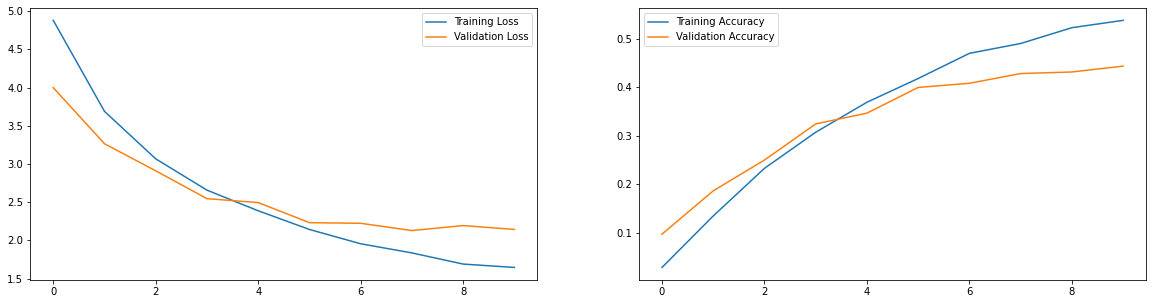

In [46]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

#### The training and test accuracy are in sync, we are able to reduce overfitting by using data augmentation


In [47]:
#Save the model & weights for future reference
model_json = MobileNet_model.to_json()
with open("MobileNet_model.json", "w") as file:
  file.write(model_json)

MobileNet_model.save_weights("MobileNet_model_weights.h5")

Fitting the previous model for more epochs to train the network futher

In [48]:
history = MobileNet_model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=10, validation_data=test_generator, validation_steps=len(test_generator))

Epoch 1/10
255/255 [==============================] - 96s 375ms/step - loss: 1.4987 - accuracy: 0.5767 - val_loss: 2.0286 - val_accuracy: 0.4563
Epoch 2/10
255/255 [==============================] - 95s 374ms/step - loss: 1.3935 - accuracy: 0.5969 - val_loss: 2.0642 - val_accuracy: 0.4692
Epoch 3/10
255/255 [==============================] - 96s 375ms/step - loss: 1.3180 - accuracy: 0.6207 - val_loss: 2.0845 - val_accuracy: 0.4570
Epoch 4/10
255/255 [==============================] - 95s 375ms/step - loss: 1.2612 - accuracy: 0.6370 - val_loss: 2.0285 - val_accuracy: 0.4762
Epoch 5/10
255/255 [==============================] - 96s 376ms/step - loss: 1.2133 - accuracy: 0.6454 - val_loss: 2.1009 - val_accuracy: 0.4726
Epoch 6/10
255/255 [==============================] - 96s 378ms/step - loss: 1.1636 - accuracy: 0.6573 - val_loss: 2.0679 - val_accuracy: 0.4831
Epoch 7/10
255/255 [==============================] - 99s 387ms/step - loss: 1.1024 - accuracy: 0.6729 - val_loss: 2.1800 - val_ac

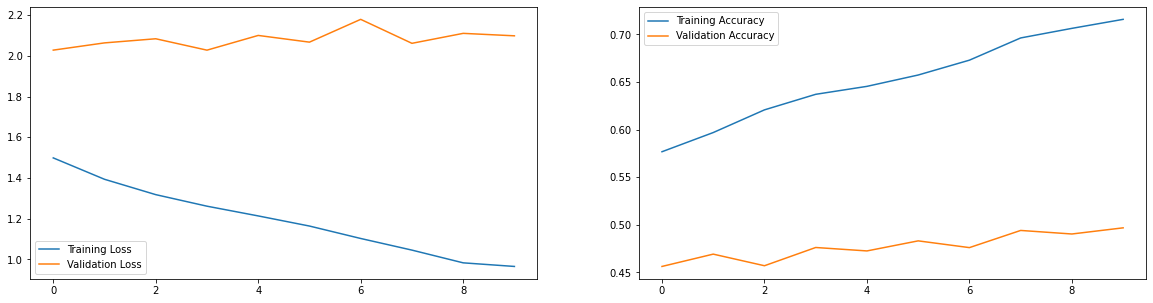

In [49]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

Training accuracy increased to 71% and test accuracy increased to almost 50%
There is no significant improvement in the test accuracy, the accuracy tends to saturate at 50%